* **Course: ANA500 MICROPROJECT - MICROSOFT STOCK PRICE PREDICTION**
* **Author - Magnus Aghe**

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
# Load the data
Microsoft_Stock_dataset = pd.read_csv("Microsoft_Stock.csv", parse_dates=[0])

In [3]:
df = Microsoft_Stock_dataset
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume
1506,2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,2021-03-30 16:00:00,233.53,233.85,231.10,231.85,24792012
1510,2021-03-31 16:00:00,232.91,239.10,232.39,235.77,43623471


In [5]:
#summary statistics
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [6]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [7]:
df.shape

(1511, 6)

In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [9]:
# check for null values
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
# Unique values

df.nunique().sort_values(ascending=True)

Low       1397
Close     1398
High      1400
Open      1409
Date      1511
Volume    1511
dtype: int64

In [11]:
# Datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


## Micro-Project 2 Begins

### Exploratory Data Analysis - Visualizing the data

Let's look at the histogram distributions of the MSFT closing price, the daily traded volume, and the plot  of MSFT stock price (Close) over time.

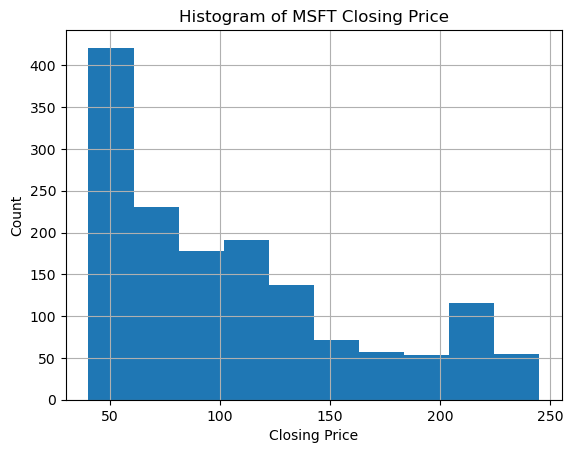

In [12]:
## histogram of closing price (Close)

plt.hist(df.Close)
plt.title('Histogram of MSFT Closing Price')
plt.xlabel('Closing Price')
plt.ylabel('Count')
plt.grid(True)

The stock price closed at about 50 dollars more than 400 times, almost double the nearest closing price.  

In [13]:
from scipy import stats


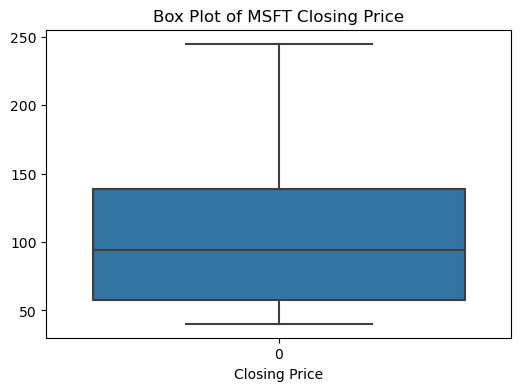

In [14]:
# Box plot to visualize the distribution of closing price

plt.figure(figsize=(6, 4))
sns.boxplot(df['Close'])
plt.title('Box Plot of MSFT Closing Price')
plt.xlabel('Closing Price')
plt.show()

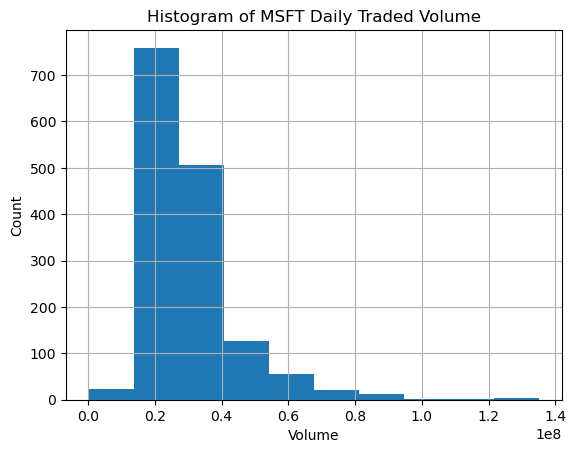

In [15]:
## histogram of daily traded volume (Volume)

plt.hist(df.Volume)
plt.title('Histogram of MSFT Daily Traded Volume')
plt.xlabel('Volume')
plt.ylabel('Count')
plt.grid(True)

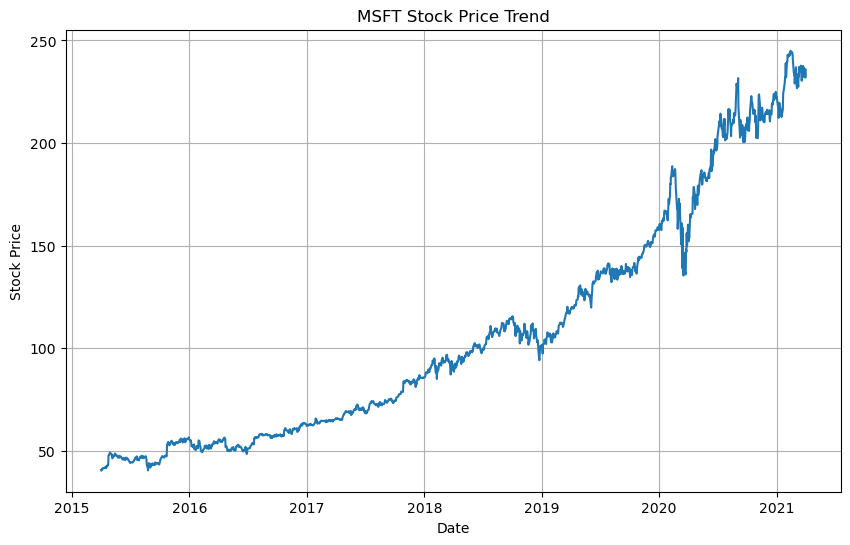

In [16]:
# Time series plot of MSFT closing stock price

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('MSFT Stock Price Trend')
plt.grid(True)
plt.show()

We see an overall upward trend of MSFT stock price in the period under review (2015 - 2021).

<function matplotlib.pyplot.show(close=None, block=None)>

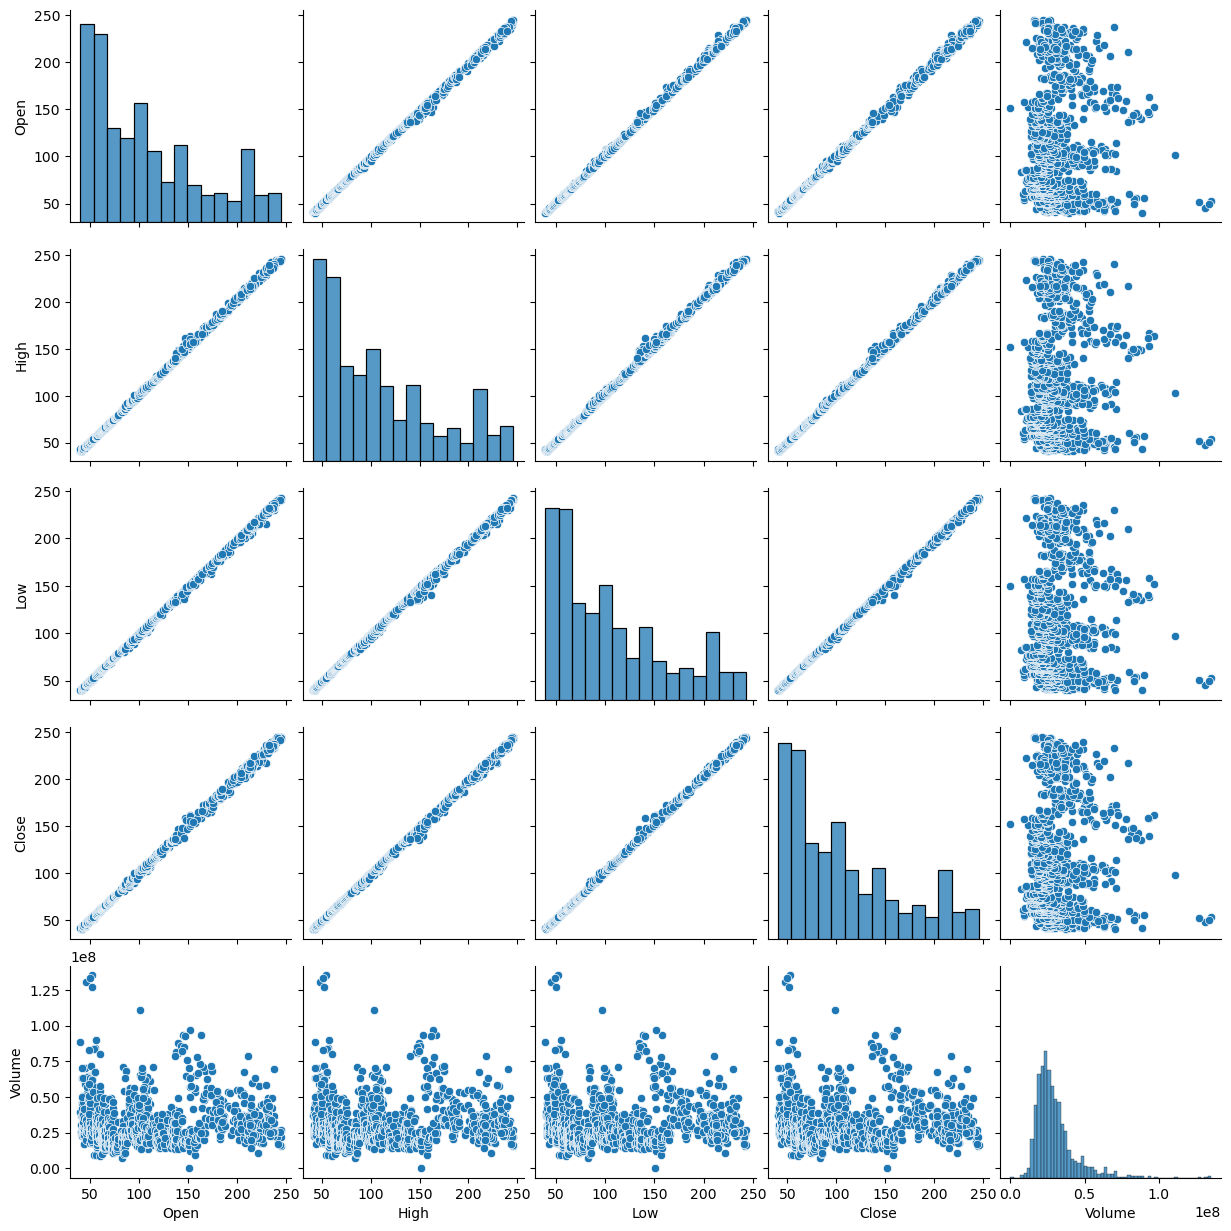

In [17]:
# Let's visualize the relationship between the quantitative variables (Open, High, Low, Close, Volume).

# Scatterplot matrix
sns.pairplot(df)
plt.show

In [18]:
# Generating the correlation matrix...

df.corr().round(2)

,Open,High,Low,Close,Volume
Open,1.00,1.00,1.00,1.00,0.05
High,1.00,1.00,1.00,1.00,0.06
Low,1.00,1.00,1.00,1.00,0.04
Close,1.00,1.00,1.00,1.00,0.05
Volume,0.05,0.06,0.04,0.05,1.00


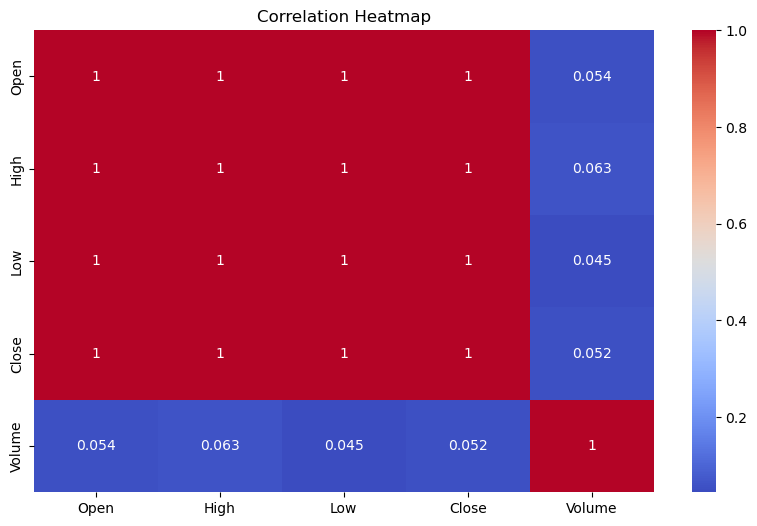

In [19]:
# ...And the correlation heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

There is a perfect correlation between the opening, high, low, and closing prices of MSFT. Between these prices and the volume traded, the correlation is much smaller.

The correlation between trading volume and closing stock price movements is 0.052 = 5.2%

### Seasonal Decomposition of the Time Series (Trend, Seasonality, and Residuals)

In [20]:
# Converting the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Setting the date column as the index
df.set_index('Date', inplace=True)

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

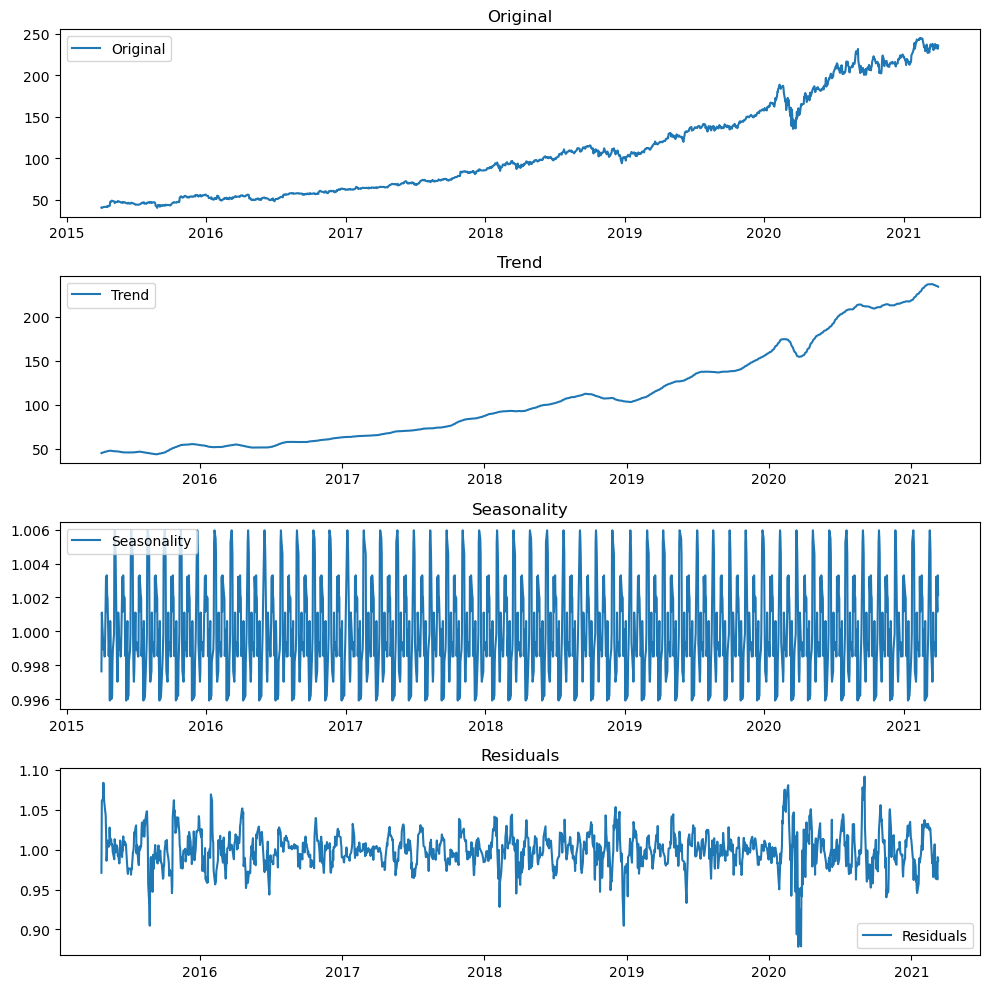

In [22]:
plt.figure(figsize=(10, 10))

plt.subplot(411)
plt.plot(df['Close'], label='Original')
plt.legend(loc='best')
plt.title('Original')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.title('Seasonality')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.title('Residuals')

plt.tight_layout()
plt.show()

## Plotting the 30-day moving average for MSFT.

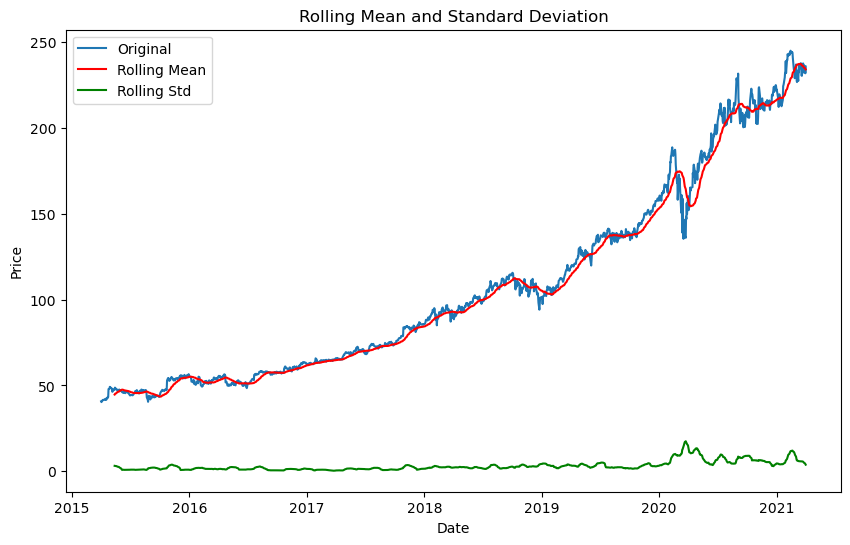

In [23]:
# 30-day moving average (Rolling mean) and standard deviation

rolling_mean = df['Close'].rolling(window=30).mean()
rolling_std = df['Close'].rolling(window=30).std()


df['rolling_mean'] = df['Close'].rolling(window=30).mean()
df['rolling_std'] = df['Close'].rolling(window=30).std()

plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='r')
plt.plot(rolling_std, label='Rolling Std', color='g')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Average Daily Return and Volatility (Standard Deviation)

In [24]:
# Calculate the daily returns
df['Return'] = df['Close'].pct_change()

# Calculate the average daily return
average_daily_return = df['Return'].mean()

# Calculate the volatility (standard deviation) of daily returns
volatility = df['Return'].std()

# Print the results
print("Average Daily Return:", round(average_daily_return, 5))
print("Volatility:", round(volatility, 5))

Average Daily Return: 0.00132
Volatility: 0.01745


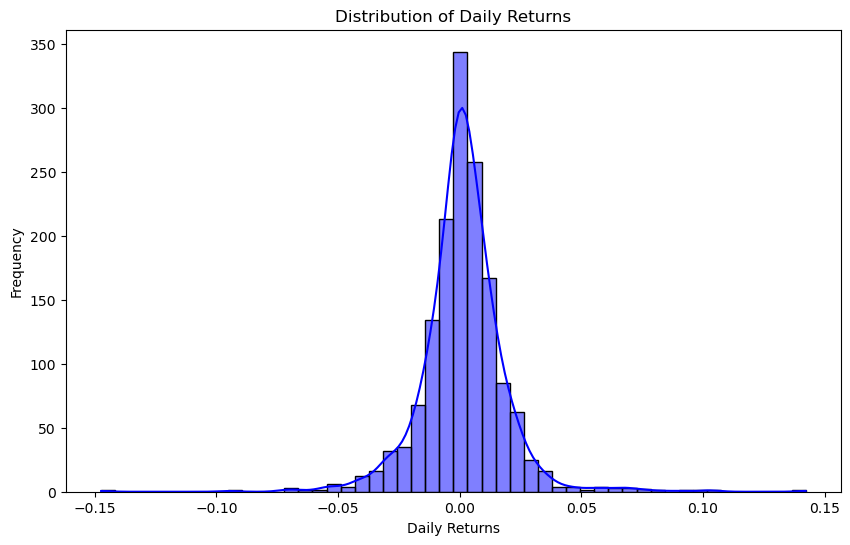

In [42]:
# Distribution plot of the daily returns
daily_returns = df['Close'].pct_change().dropna()


plt.figure(figsize=(10, 6))
sns.histplot(daily_returns, kde=True, bins=50, color='blue')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

In [26]:
# To calculate the historical volatility using the daily returns, and assuming there are 252 trading days in a year
df['Return'] = df['Close'].pct_change()
df['Volatility'] = df['Return'].rolling(window=30).std() * (252 ** 0.5)  


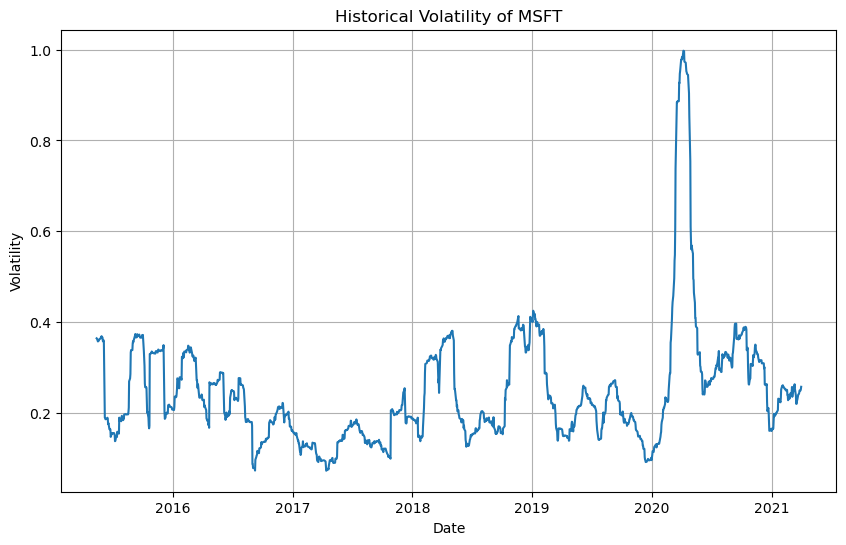

In [27]:
# Plot the volatility
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Volatility'])
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Historical Volatility of MSFT')
plt.grid(True)
plt.show()

The highest period of volatility was between 2020 and 2021.

## Micro-Project 3 Begins

### Using Machine Learning Regression Techniques 

In [28]:
#Importing necessary libraries

from pathlib import Path
import math
from math import floor,ceil,sqrt
import datetime as dt

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt 
import seaborn as sns
from sklearn import preprocessing


In [29]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf

In [30]:
!pip install pmdarima

In [31]:
from pmdarima.arima import auto_arima

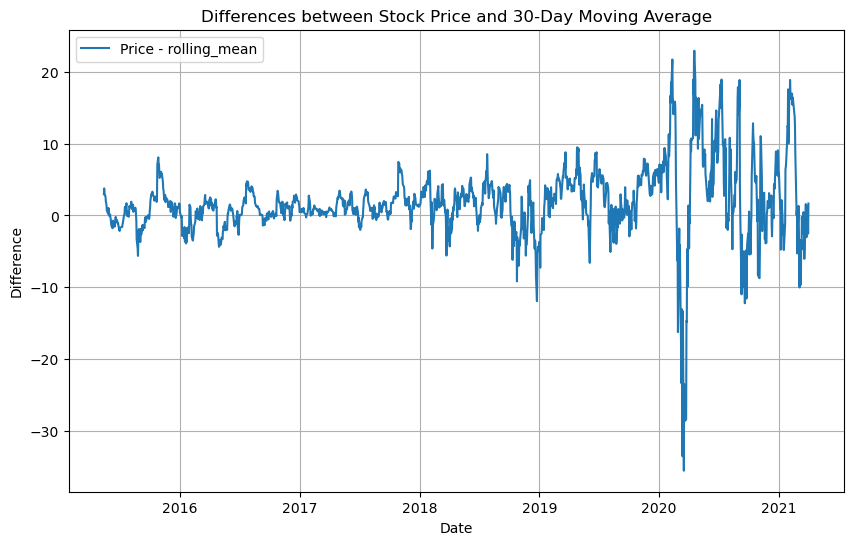

In [32]:
# Calculate the differences between the stock price and the 30-day moving average
df['rolling_mean'] = df['Close'] - df['rolling_mean']

# Plot the differences
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['rolling_mean'], label='Price - rolling_mean')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Differences between Stock Price and 30-Day Moving Average')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
df.head()

,Open,High,Low,Close,Volume,rolling_mean,rolling_std,Return,Volatility
Date,,,,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,NaN,NaN,NaN,NaN
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,NaN,NaN,-0.010560,NaN
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,NaN,NaN,0.031273,NaN
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,NaN,NaN,-0.000481,NaN
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,NaN,NaN,-0.002649,NaN


### Microsoft Stock Price Prediction using methods such as:-
1. Moving Average Prediction 
2. Linear Regression
3. Autoregressive Integrated Moving Average (ARIMA) 
4. Long Short Term Memory (LSTM)

#### Moving Average Prediction

In [34]:
# We split our data into training and validation sets in the 80:20 ratio.

def moving_avg_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.80)]
    valid_set=df_new.iloc[ceil(shape*0.80):]
    print('---------------------------------------------------------------------')
    print('-----------MICROSOFT STOCK PRICE PREDICTION BY MOVING AVERAGE--------')
    print('---------------------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    preds = []
    for i in range(0,valid_set.shape[0]):
        a = train_set['Close'][len(train_set)-valid_set.shape[0]+i:].sum() + sum(preds)
        b = a/(valid_set.shape[0])
        preds.append(b)
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-preds),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=10)
    plt.ylabel('Stock Price',size=10)
    plt.title('Microsoft Stock Price Prediction by Moving Averages',size=10)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

---------------------------------------------------------------------
-----------MICROSOFT STOCK PRICE PREDICTION BY MOVING AVERAGE--------
---------------------------------------------------------------------
Shape of Training Set (1209, 1)
Shape of Validation Set (302, 1)
RMSE value on validation set: 69.38484924906464
-----------------------------------------------------------
-----------------------------------------------------------


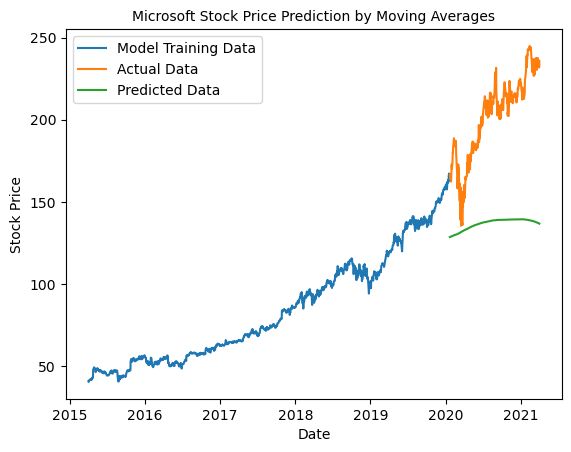

In [35]:
moving_avg_prediction(df)

With the moving average prediction, the RMSE value is 69.38. As seen from the plot, the predicted data is not that close to the actual data. Let's explore some machine learning regression methods.

#### Linear Regression Prediction

In [36]:
def linear_regression_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.80)]
    valid_set=df_new.iloc[ceil(shape*0.80):]
    print('---------------------------------------------------------------------------')
    print('-----------MICROSOFT STOCK PRICE PREDICTION BY LINEAR REGRESSION-----------')
    print('---------------------------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    #implement linear regression
    model = LinearRegression()
    model.fit(np.array(x_train).reshape(-1,1),y_train)
    preds = model.predict(np.array(x_valid).reshape(-1,1))
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-preds),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=10)
    plt.ylabel('Stock Price',size=10)
    plt.title('Microsoft Stock Price Prediction by Linear Regression',size=10)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

---------------------------------------------------------------------------
-----------MICROSOFT STOCK PRICE PREDICTION BY LINEAR REGRESSION-----------
---------------------------------------------------------------------------
Shape of Training Set (1209, 1)
Shape of Validation Set (302, 1)
RMSE value on validation set: 56.96175596453962
-----------------------------------------------------------
-----------------------------------------------------------


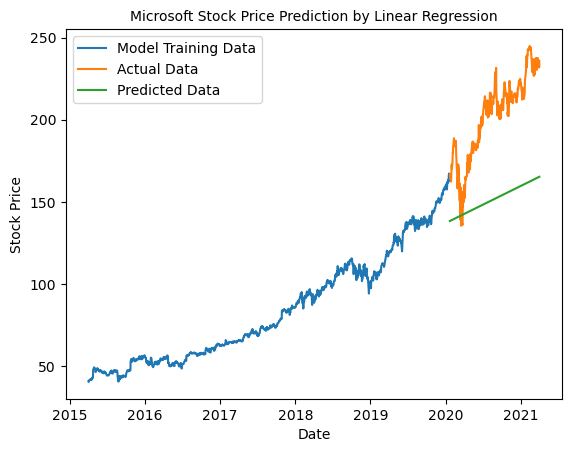

In [37]:
linear_regression_prediction(df)

With linear regression prediction, the RMSE value is 56.96. This is better than the moving average prediction in terms of accuracy and as seen from the plot, the predicted data is a bit closer to the actual data.

#### Autoregressive Integrated Moving Average (ARIMA) Prediction

ARIMA is a popular method for time series forecasting. The models use past values to predict future values, and has three important parameters namely, p (past values used to forecast the next value), q (past forecast errors used to predict future values), and d (order of differencing). 

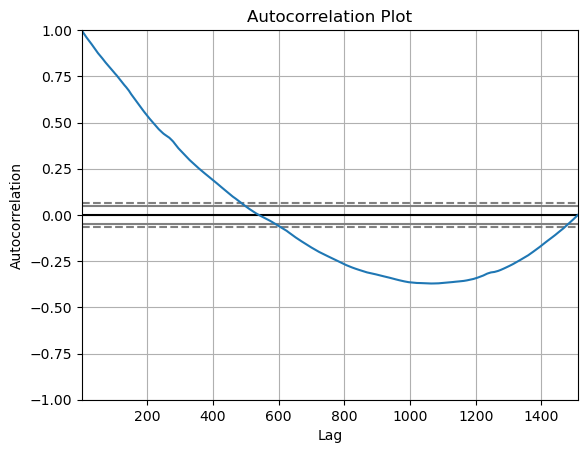

<Figure size 640x480 with 0 Axes>

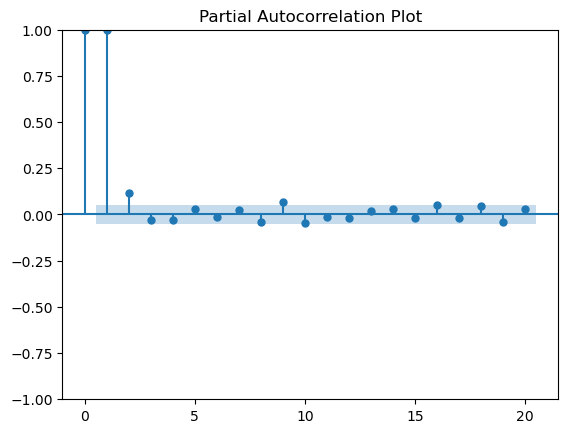

In [38]:
#Analyzing autocorrelation and partial autocorrelation plots to determine p, d, and q

plt.figure()
autocorrelation_plot(df['Close'])
plt.title('Autocorrelation Plot')
plt.show()

plt.figure()
plot_pacf(df['Close'], lags=20)
plt.title('Partial Autocorrelation Plot')
plt.show()

In [39]:

# Split the data into train and test sets
train_set = int(len(df) * 0.8)
train, test = df[:train_set], df[train_set:]

# Find the optimal order (p, d, q) for ARIMA model based on AIC or other criteria
# Here, we use the order (1, 2, 3) as an example
order = (1, 2, 3)

# Train the ARIMA model
model = ARIMA(train['Close'], order=order)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Evaluate the model using mean squared error
mse = mean_squared_error(test['Close'], predictions)
rmse = np.sqrt(mse)
print('RMSE: %.2f' % rmse)


C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 18.60


C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


---------------------------------------------------------------------------
-----------MICROSOFT STOCK PRICE PREDICTION BY ARIMA-----------------------
---------------------------------------------------------------------------
Shape of Training Set (1209, 1)
Shape of Validation Set (302, 1)
RMSE value on validation set: 18.60488784602582


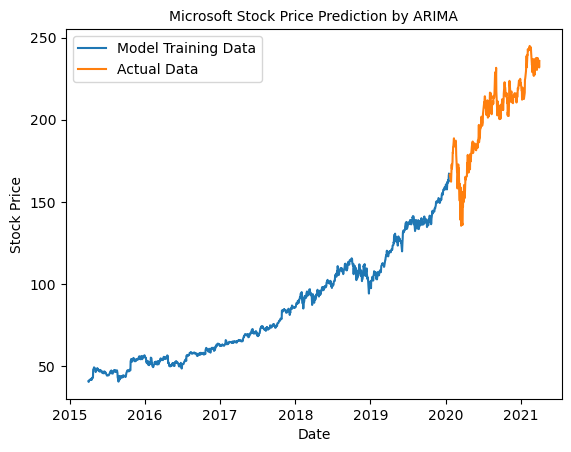

In [40]:
shape=df.shape[0]
df_new=df[['Close']]
df_new.head()
train_set=df_new.iloc[:ceil(shape*0.80)]
valid_set=df_new.iloc[ceil(shape*0.80):]
print('---------------------------------------------------------------------------')
print('-----------MICROSOFT STOCK PRICE PREDICTION BY ARIMA-----------------------')
print('---------------------------------------------------------------------------')
print('Shape of Training Set',train_set.shape)
print('Shape of Validation Set',valid_set.shape)
print('RMSE value on validation set:',rmse)


plt.plot(train_set['Close'])
plt.plot(valid_set['Close'])
plt.xlabel('Date',size=10)
plt.ylabel('Stock Price',size=10)
plt.title('Microsoft Stock Price Prediction by ARIMA',size=10)
plt.legend(['Model Training Data','Actual Data','Predicted Data'])

With ARIMA predictive model, the RMSE value is 18.60. This is much better than both linear regression models and the moving average predictive model. However, we can find the best ARIMA model, based on the order of p,d, q.

In [41]:
import itertools

# Define the range of p, d, and q values to try
p = range(0, 6)
d = range(0, 3)
q = range(0, 6)

# Generate all combinations of p, d, and q values
pdq_combinations = list(itertools.product(p, d, q))

# Function to find the best ARIMA model based on AIC
def find_best_arima(train_data, pdq_values):
    best_aic = float('inf')
    best_order = None

    for order in pdq_values:
        try:
            model = ARIMA(train_data, order=order)
            model_fit = model.fit()
            aic = model_fit.aic

            if aic < best_aic:
                best_aic = aic
                best_order = order

        except:
            continue

    return best_order, best_aic

# Find the best ARIMA model
best_order, best_aic = find_best_arima(train['Close'], pdq_combinations)
print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")

# Train the ARIMA model with the best order
model = ARIMA(train['Close'], order=best_order)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Evaluate the model using mean squared error
mse = mean_squared_error(test['Close'], predictions)
rmse = np.sqrt(mse)
print('RMSE: %.2f' % rmse)

C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\a

C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\a

C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\magnu\a

Best ARIMA order: (5, 2, 1) with AIC: 3918.801366924544
RMSE: 17.09


C:\Users\magnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


The best ARIMA model has an RMSE of 17.09.

## Micro-Project 4 Begins

### Using Neural Network's LSTM with TensorFlow